## Craigslist Used-Car Price Prediction !!

In [80]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import pandas as pd
import sklearn.feature_selection as fs
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats

## Task 1 (Only basic visualisation is shown here). Other relevant graphs are shown in preprocessing task.

#### Assembled the data into a pandas dataframe. 'target' variable is price and we have 24 features.
#### Out of the 24 features, only 13 of them seem to be majorly useful for the price prediction basing on our priliminary investigation and visualizations performed. Some of the analysis has been presented below.
#### Relevant Features Selected: 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'
#### Excluded Features: 'id','url', 'region', 'region_url', 'vin', 'image_url', 'description', 'lat','long', 'state', 'county'
#### Features like 'id' and 'vin' leak information because of their 1-1 mapping correspondence to the price column.

In [81]:
path = './vehicles.csv'
dfx = pd.read_csv(path)
# dfx.describe()

In [82]:
df1 = dfx
# Keeping this filter to get better visulaizations
df1 = df1[(df1['price'] < 200000) & (df1['price'] > 1000)]
df1 = df1[(df1.odometer < 300000) & (df1.odometer > 1000)]
feat = ['year', 'condition', 'cylinders', 'fuel', 'odometer', 
        'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'];

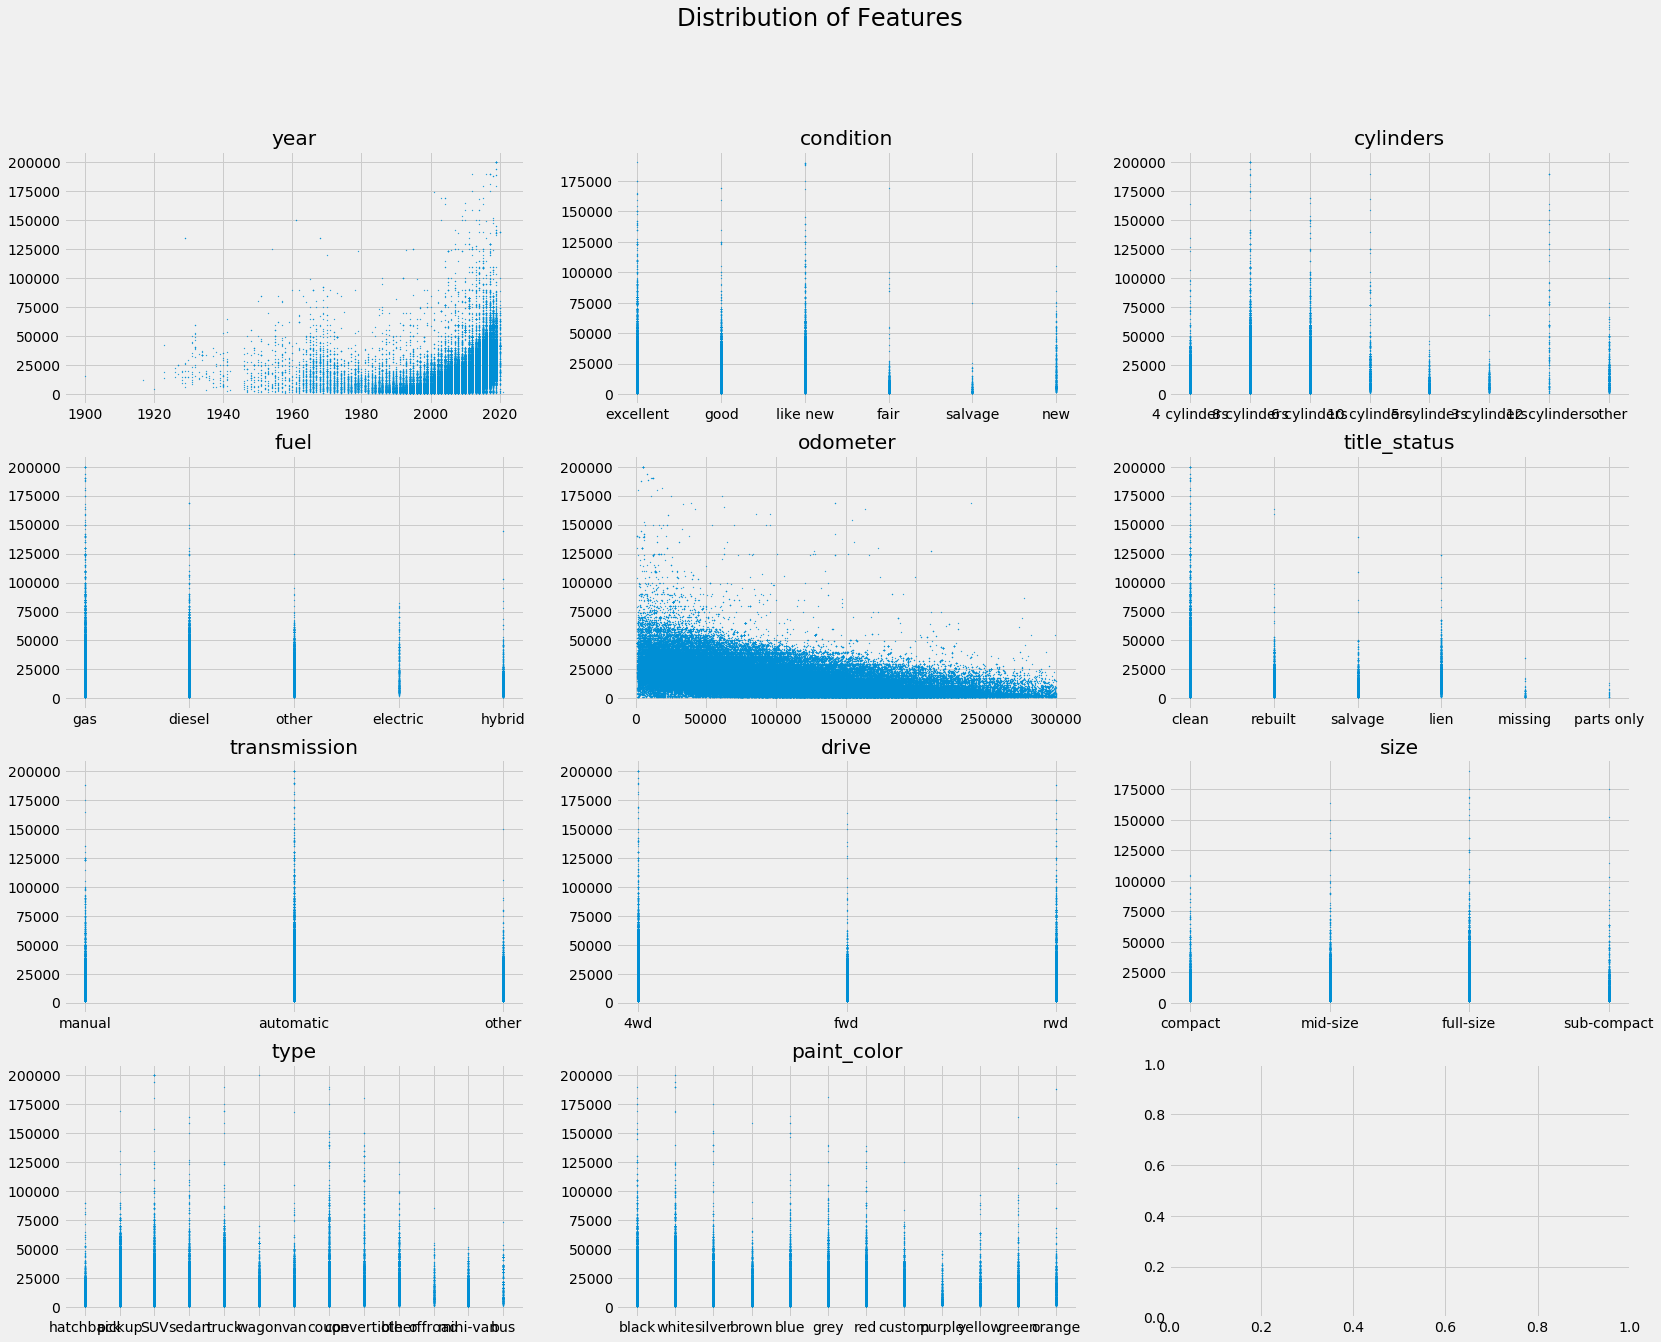

In [83]:
fig, axes = plt.subplots(4,3, figsize=(25,20));
ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33, ax41, ax42, ax43 = axes.ravel();
fig.suptitle('Distribution of Features', fontsize = 'xx-large');
j = 0
for ax in axes.flatten():
    df2 = df1.drop(df1.columns.difference(['price', feat[j]]), 1)
    df2 = df2.dropna(axis=0, how ='any')
    ax.scatter(df2[feat[j]], df2['price'], s=3, marker='.', alpha=0.75);
    ax.title.set_text(feat[j]);
    j = j+1;
    if j==11:
        break

### From above graphs, we can see +ve relation b/w 'price' and 'year' of purchase and -ve relation b/w 'price' and 'odometer'. And the influence ofother categorical variables is not straight forward to understand from the above graphs. We later explained their relevance through box plots when we pre-process categorical variables.

In [84]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

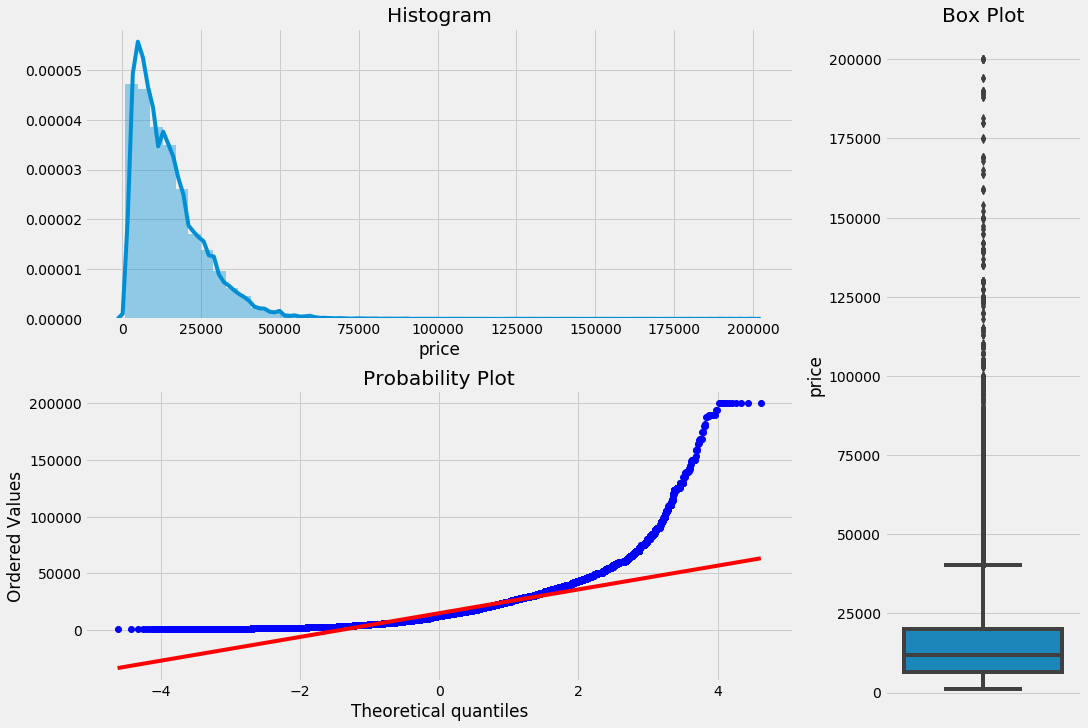

In [85]:
plotting_3_chart(df1,'price')

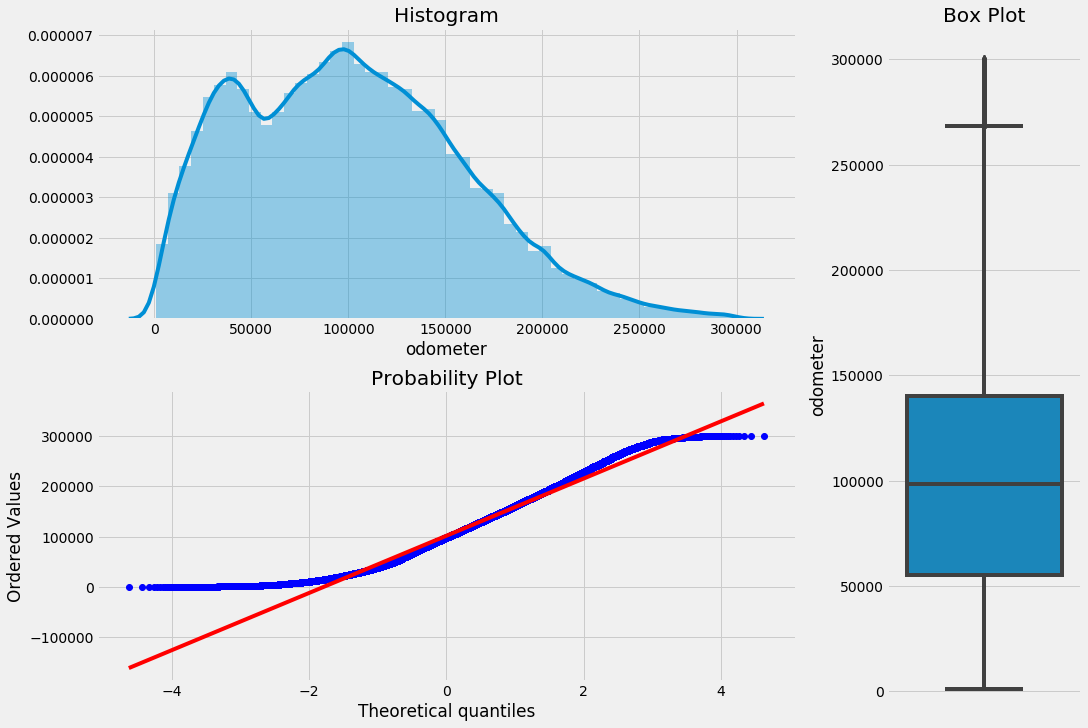

In [86]:
plotting_3_chart(df1,'odometer');

### The above histogram, QQ plot and box plots for price and odometer tell us that the target vary is nor normally distributed and also that it has heavy outliers. The odometer feature is close to normal distribution. Further analysis on each individual feature has been performed and the inference has been used in the Task 3 (feature engineering).

## Task 2 (Baseline Model)

In [87]:
df1 = dfx;
df1 = df1[(df1['price'] < 200000) & (df1['price'] > 1000)]
df1 = df1[(df1.odometer < 300000) & (df1.odometer > 1000)]
df1 = df1[df1.year>1985]
drop_cols = ['id','url', 'region', 'region_url', 'vin', 'image_url', 'description', 'lat','long', 'state', 'county', 'type', 'paint_color']
df1.drop(columns = drop_cols, inplace = True);

In [88]:
df1.describe(include='all')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size
count,359038.000000,359038.000000,348987,355710,210967,236530,356067,359038.000000,356622,356009,286138,126848
unique,NaN,NaN,42,26029,6,8,5,NaN,6,3,3,4
top,NaN,NaN,ford,f-150,excellent,6 cylinders,gas,NaN,clean,automatic,4wd,full-size
freq,NaN,NaN,65250,8549,107957,86440,311941,NaN,343160,325271,136571,68798
mean,14710.383898,2010.813357,NaN,NaN,NaN,NaN,NaN,102491.448702,NaN,NaN,NaN,NaN
std,11249.629935,5.507176,NaN,NaN,NaN,NaN,NaN,57414.325217,NaN,NaN,NaN,NaN
min,1025.000000,1986.000000,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN
25%,6488.000000,2007.000000,NaN,NaN,NaN,NaN,NaN,56004.000000,NaN,NaN,NaN,NaN
50%,11995.000000,2012.000000,NaN,NaN,NaN,NaN,NaN,99000.000000,NaN,NaN,NaN,NaN
75%,19988.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,141000.000000,NaN,NaN,NaN,NaN


In [89]:
## Removing 'type' and 'paint_color' columns additionally because of a high number of unique values (13 & 12 respectively).
## We just want to do a baseline test here using simple OHE for categorical variables.

In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [91]:
### For all categorical variables, we are just using a new category (no_colname) in this baseline model.
df1 = df1.fillna({'manufacturer':'no_manu', 'model':'no_model', 'condition':'no_cond', 'cylinders':'no_cylin', 'fuel':'no_fuel',
                     'transmission':'no_transmission', 'title_status':'no_title_status','size':'no_size', 'drive':'no_drive'})


In [92]:
df1 = df1.sample(n=200000, random_state=3, replace=False)
# Splitting into train and test set
train_set, test_set = train_test_split(df1, test_size=0.20, random_state=5, shuffle = True)

y_train = train_set['price']
X_train = train_set.drop(columns = ['price'])
y_test = test_set['price']
X_test = test_set.drop(columns = ['price'])

In [93]:
num_cols = ['year', 'odometer']
cat_cols = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size']
tgt_cols = ['manufacturer', 'model']

num_pipe = Pipeline([('median_imputing', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                    ("scaler", StandardScaler())])
#Scaling numerical features is not helping much !! Still scaling though as standard practice.
cat_pipe = Pipeline([('ohe_encoding', OneHotEncoder(handle_unknown='ignore'))])
tgt_pipe = Pipeline([('tgt_encoding', ce.TargetEncoder(handle_missing='value', handle_unknown='value')), 
                    (("scaler", StandardScaler()))])

preprocess = ColumnTransformer(transformers = [("num_imp", num_pipe, num_cols),
         ("tgt_enc", tgt_pipe, tgt_cols), ("cat_ohe", cat_pipe, cat_cols)], remainder='passthrough')

In [94]:
# #### CV Block and w/o using pipeline ##
lin_reg_cv_score = cross_val_score(make_pipeline(preprocess, LinearRegression()), X_train, y_train, cv=5)
print("CV Score for baseline model:", np.mean(lin_reg_cv_score))

CV Score for baseline model: 0.7041682947316057


In [95]:
### Pipeline approach for Lin Reg ###
model = make_pipeline(preprocess, LinearRegression())
model.fit(X_train, y_train)
print("Test Accuracy for baseline model:", model.score(X_test,y_test))

Test Accuracy for baseline model: 0.7006189443419828


#### For above task 2, with just basic preprocessing, we got a decent CV score and a very comparable test score for the linear model.

## Task 3 Feature Engineering (Additional Pre-processing)

#### Part 1: First showing visualisations (box plots) and then discussing approaches to preprocessing and categorical variable encoding.

In [96]:
df1 = dfx;
df1 = df1[(df1['price'] < 200000) & (df1['price'] > 1000)]
df1 = df1[(df1.odometer < 300000) & (df1.odometer > 1000)]
df1 = df1[df1.year>1985]
drop_cols = ['id','url', 'region', 'region_url', 'vin', 'image_url', 'description', 'lat','long', 'state', 'county']
df1.drop(columns = drop_cols, inplace = True);
# df1.describe(include='all')

In [97]:
null_values=df1.isna().sum()
null_values=pd.DataFrame(null_values,columns=['# null'])
sum_tot=len(df1)
null_values['percent']=null_values['# null']/sum_tot
null_values['percent'] = null_values['percent'] *100
null_values.sort_values('percent',ascending=False)
print("%age of NaN values in the raw data file:\n")
print(null_values)

%age of NaN values in the raw data file:

              # null    percent
price              0   0.000000
year               0   0.000000
manufacturer   10051   2.799425
model           3328   0.926921
condition     148071  41.241039
cylinders     122508  34.121179
fuel            2971   0.827489
odometer           0   0.000000
title_status    2416   0.672909
transmission    3029   0.843643
drive          72900  20.304257
size          232190  64.670035
type           68348  19.036425
paint_color    87873  24.474568


### Major missing columns - size, condition, cylinders majorly followed by paint, drive, type (if they seem to be helpful features).

#### We are using box plots to understand the distribution of the price wrt. each categorical variable in a column and then filling the categorical values with numbers (and ofcourse by maintaining ordinality). Again, because this processing should not leak information, we split the data and only understand the data distibution/patterns from the training set before imputing values and preprocessing.

In [98]:
df1 = df1.sample(n=200000, random_state=3, replace=False)
# Splitting into train and test set
train_set, test_set = train_test_split(df1, test_size=0.20, random_state=5, shuffle = True)

y_train = train_set['price']
X_train = train_set.drop(columns = ['price'])
y_test = test_set['price']
X_test = test_set.drop(columns = ['price'])

###### Filling car 'condition' NA's using 'year' information

In [99]:
X_train.loc[X_train.year>=2019, 'condition'] = X_train.loc[X_train.year>=2019, 'condition'].fillna('new')
X_train.loc[X_train.year>=2017, 'condition'] = X_train.loc[X_train.year>=2017, 'condition'].fillna('like new')

In [100]:
excellent_odo_mean = X_train[X_train['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = X_train[X_train['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = X_train[X_train['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = X_train[X_train['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = X_train[X_train['condition'] == 'fair']['odometer'].mean()
new_odo_mean = X_train[X_train['condition'] == 'new']['odometer'].mean()

print("'New' average value of odometer:", round( new_odo_mean,2))
print("'Like new' average value of odometer:", round( like_new_odo_mean,2))
print("'Excellent' average value of odometer:", round( excellent_odo_mean,2))
print("'Good' average value of odometer:", round( good_odo_mean,2))
print("'Fair' average value of odometer:", round( fair_odo_mean,2))
print("'Salvage' average value of odometer:", round( salvage_odo_mean,2))

'New' average value of odometer: 22303.81
'Like new' average value of odometer: 58283.31
'Excellent' average value of odometer: 106284.94
'Good' average value of odometer: 117045.07
'Fair' average value of odometer: 173290.62
'Salvage' average value of odometer: 123711.27


###### Filling remaining 'condition' NA's using 'odometer' information (average value imputation by grouping)

In [101]:
X_train.loc[X_train['odometer'] <= like_new_odo_mean, 'condition'] = X_train.loc[X_train['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

X_train.loc[X_train['odometer'] >= fair_odo_mean, 'condition'] = X_train.loc[X_train['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

X_train.loc[((X_train['odometer'] > like_new_odo_mean) & 
       (X_train['odometer'] <= excellent_odo_mean)), 'condition'] = X_train.loc[((X_train['odometer'] > like_new_odo_mean) & 
       (X_train['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

X_train.loc[((X_train['odometer'] > excellent_odo_mean) & 
       (X_train['odometer'] <= good_odo_mean)), 'condition'] = X_train.loc[((X_train['odometer'] > excellent_odo_mean) & 
       (X_train['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

X_train.loc[((X_train['odometer'] > good_odo_mean) & 
       (X_train['odometer'] <= fair_odo_mean)), 'condition'] = X_train.loc[((X_train['odometer'] > good_odo_mean) & 
       (X_train['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

###### We are first using forward fill for categorical variables to fill NA's. We later use box plots and do ordinal encoding.

In [102]:
X_train['transmission'] = X_train['transmission'].fillna(method='ffill')
X_train['cylinders'] = X_train['cylinders'].fillna(method='ffill')
X_train['title_status'] = X_train['title_status'].fillna(method='ffill')
X_train['fuel'] = X_train['fuel'].fillna(method='ffill')
X_train['size'] = X_train['size'].fillna(method='ffill')
X_train['paint_color'] = X_train['paint_color'].fillna(method='ffill')
X_train['drive'] = X_train['drive'].fillna(method='ffill')
X_train['manufacturer'] = X_train['manufacturer'].fillna(method='ffill')
X_train['type'] = X_train['type'].fillna(method='ffill')
X_train['model'] = X_train['model'].fillna(method='ffill')

In [103]:
null_values=X_train.isna().sum()
null_values=pd.DataFrame(null_values,columns=['# null'])
sum_tot=len(X_train)
null_values['percent']=null_values['# null']/sum_tot
null_values['percent'] = null_values['percent'] *100
null_values.sort_values('percent',ascending=False)
print("%age of NaN values in the raw data file:\n")
print(null_values)

%age of NaN values in the raw data file:

              # null  percent
year               0      0.0
manufacturer       0      0.0
model              0      0.0
condition          0      0.0
cylinders          0      0.0
fuel               0      0.0
odometer           0      0.0
title_status       0      0.0
transmission       0      0.0
drive              0      0.0
size               0      0.0
type               0      0.0
paint_color        0      0.0


In [104]:
### At this stage we are done with imputation. We will now proceed to do ordinal encoding for categorical variables.
### For this, we take the help of boxplots to visualise the price patterns for each column.

In [105]:
### Combining X_train and y_train for box plotting.
df = X_train.join(y_train)

Box plots for 'condition' and 'cylinders' features:


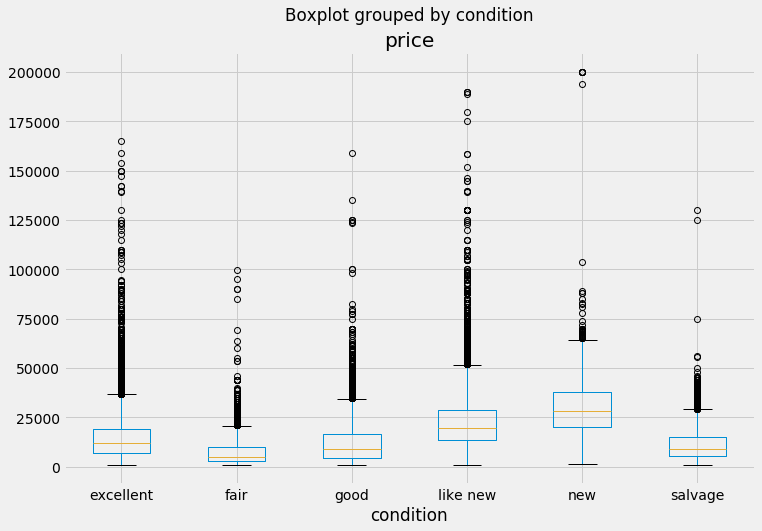

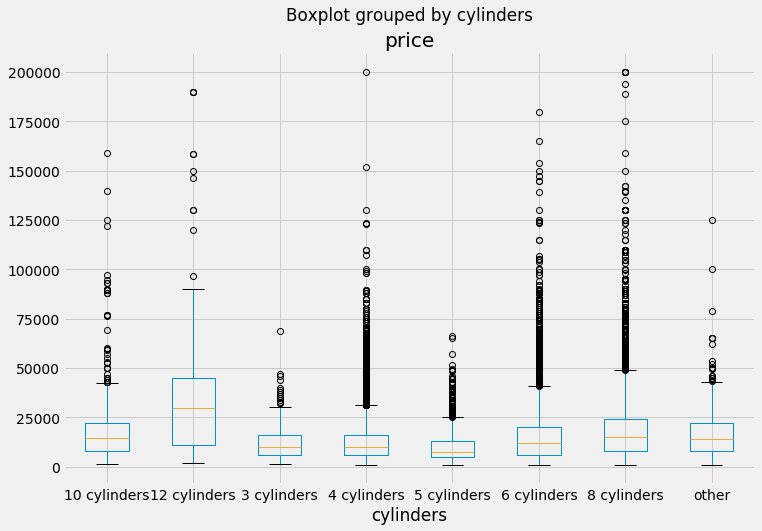

In [106]:
print("Box plots for 'condition' and 'cylinders' features:");
df.boxplot(column='price', by='condition', figsize= (12,8));
df.boxplot(column='price', by='cylinders', figsize= (12,8));

##### Using the below ordinal encoding as per above plots.

In [107]:
X_train['condition'].replace(['fair', 'salvage', 'good', 'excellent', 'like new', 'new'], 
                         [1,2,3,4,5,6], inplace = True)

X_train['cylinders'].replace(['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', 
                          '12 cylinders', 'other'], [2,3,1,4,7,6,8,5], inplace=True)

Box plots for 'drive' and 'fuel' features:


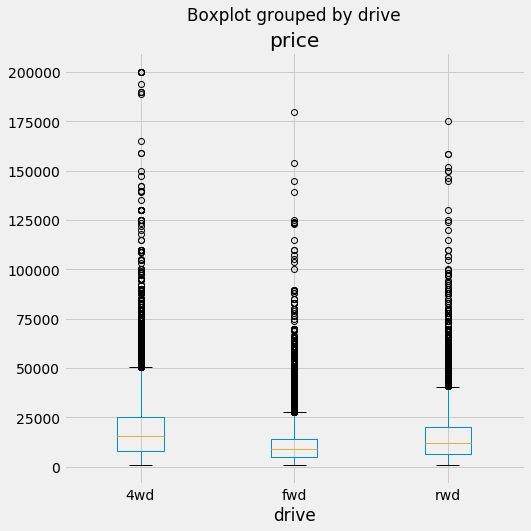

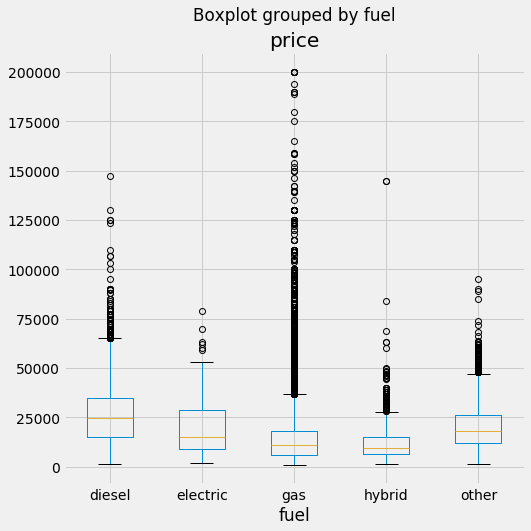

In [108]:
print("Box plots for 'drive' and 'fuel' features:");
df.boxplot(column='price', by='drive', figsize= (8,8));
df.boxplot(column='price', by='fuel', figsize= (8,8));

##### Using the below ordinal encoding as per above plots.

In [109]:
X_train['fuel'].replace(['hybrid', 'gas', 'electric', 'other', 'diesel'], [1,2,3,4,5], inplace=True);
X_train['drive'].replace(['fwd', 'rwd', '4wd'], [1,2,3], inplace=True);

Box plots for 'type' and 'title_status' features:


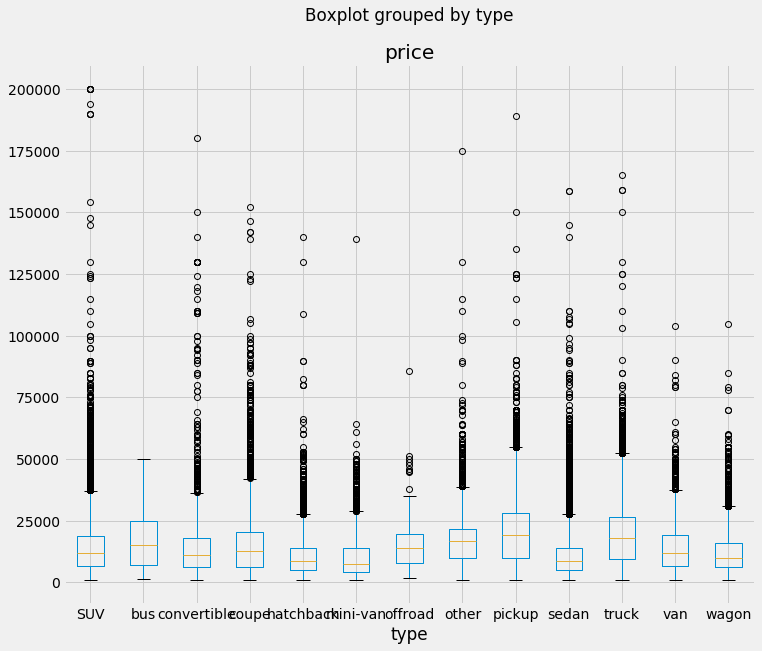

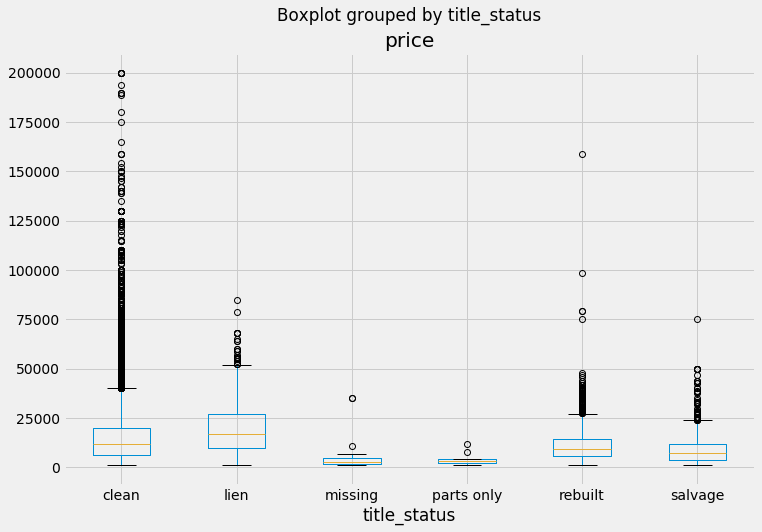

In [110]:
print("Box plots for 'type' and 'title_status' features:");
df.boxplot(column='price', by='type', figsize= (12,10));
df.boxplot(column='price', by='title_status', figsize= (12,8));

##### Using the below ordinal encoding as per above plots.

In [111]:
X_train['type'].replace(['hatchback', 'mini-van', 'sedan'], [1,1,1], inplace=True);
X_train['type'].replace(['SUV', 'convertible', 'offroad','van', 'wagon'], [2,2,2,2,2], inplace=True);
X_train['type'].replace(['bus', 'other'], [3,3], inplace=True);
X_train['type'].replace(['coupe','pickup', 'truck'], [4,4,4], inplace=True);

X_train['title_status'].replace(['missing', 'parts only', 'salvage', 'rebuilt', 'clean', 'lien'], 
                                [1,1,2,3,4,5], inplace=True);

Box plots for 'size' feature:


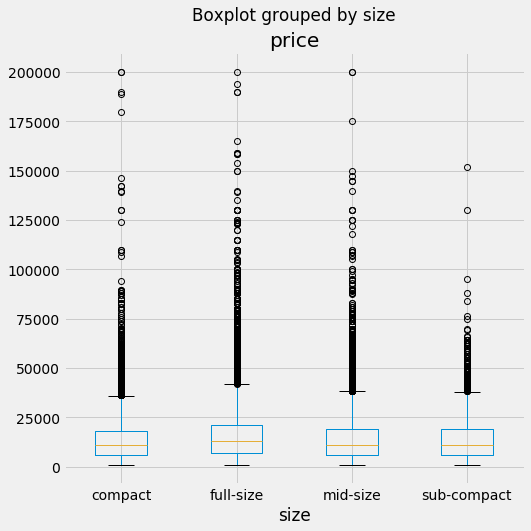

In [112]:
print("Box plots for 'size' feature:");
df.boxplot(column='price', by='size', figsize= (8,8));

##### Using the below ordinal encoding as per above plots.

In [113]:
X_train['size'].replace(['compact', 'mid-size', 'sub-compact', 'full-size'], [1,2,3,4], inplace=True);

Box plots for 'transmission' and 'paint_color' features:


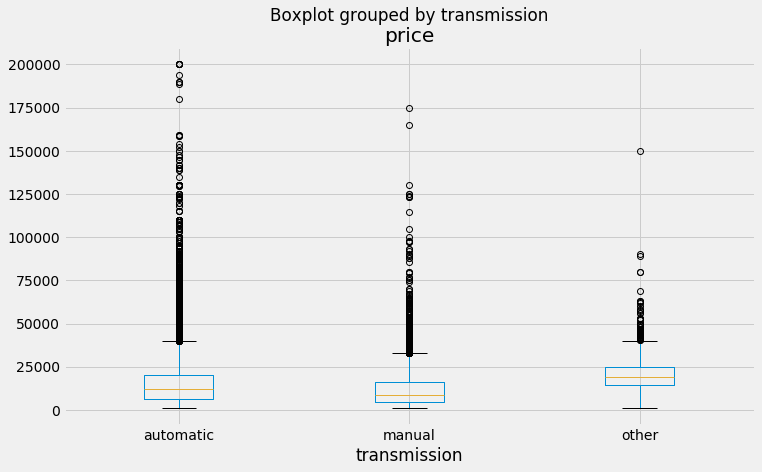

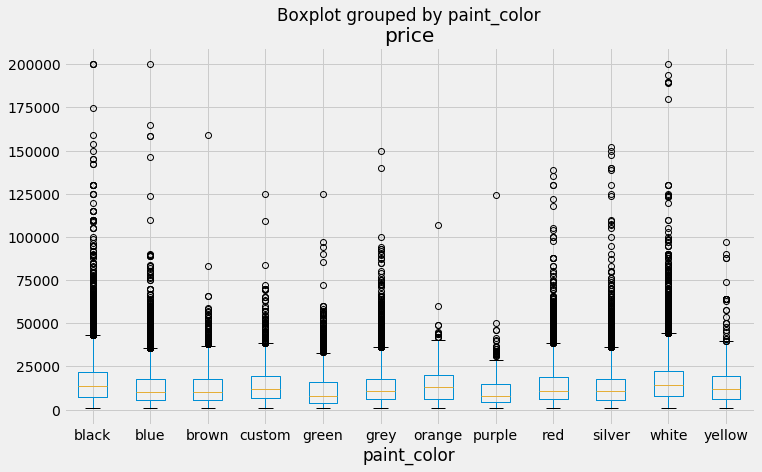

In [114]:
print("Box plots for 'transmission' and 'paint_color' features:");
df.boxplot(column='price', by='transmission', figsize= (12,7));
df.boxplot(column='price', by='paint_color', figsize= (12,7));

##### Using the below ordinal encoding for 'transmission' and dropping 'paint_color' from the training set as the box plot looks fairly even for all the different colors across the data.

In [115]:
X_train['transmission'].replace(['manual', 'automatic', 'other'], [1,2,3], inplace=True);
#Dropping paint columns as the pattern seems to be similar and not important
df.drop(columns = ['paint_color'], inplace = True)

## Making sure paint_color is not present in the X_train dataset too.
X_train.drop(columns = ['paint_color'], inplace = True)

### At this point even working on categorical features is also complete. Let us run the earlier model in task 2 on this clean data set now.

In [116]:
# X_train.describe(include='all')

In [117]:
num_cols = ['year', 'odometer']
tgt_cols = ['manufacturer', 'model']
prc_cols = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type']

#Scaling features after imputing, although is not helping much !!

num_pipe = Pipeline([('median_imputing', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                    ("scaler", StandardScaler())])
tgt_pipe = Pipeline([('tgt_encoding', ce.TargetEncoder(handle_missing='value', handle_unknown='value')), 
                    (("scaler", StandardScaler()))])
preprocess = ColumnTransformer(transformers = [("num_imp", num_pipe, num_cols),
                                               ("tgt_enc", tgt_pipe, tgt_cols)], remainder='passthrough')

X_train_pro = preprocess.fit_transform(X_train, y_train)

In [118]:
#### CV Block and using pipeline ####
lin_reg_cv_score = cross_val_score(make_pipeline(preprocess, LinearRegression()), X_train, y_train, cv=5)
print("CV Score for baseline model (after full pre-processing):", np.mean(lin_reg_cv_score))

CV Score for baseline model (after full pre-processing): 0.6892623799057167


### Preprocessing the categorical features of the test data the same way before passing through pipeline.

In [119]:
X_test.loc[X_test.year>=2019, 'condition'] = X_test.loc[X_test.year>=2019, 'condition'].fillna('new')
X_test.loc[X_test.year>=2017, 'condition'] = X_test.loc[X_test.year>=2017, 'condition'].fillna('like new')

X_test.loc[X_test['odometer'] <= like_new_odo_mean, 'condition'] = X_test.loc[X_test['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

X_test.loc[X_test['odometer'] >= fair_odo_mean, 'condition'] = X_test.loc[X_test['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

X_test.loc[((X_test['odometer'] > like_new_odo_mean) & 
       (X_test['odometer'] <= excellent_odo_mean)), 'condition'] = X_test.loc[((X_test['odometer'] > like_new_odo_mean) & 
       (X_test['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

X_test.loc[((X_test['odometer'] > excellent_odo_mean) & 
       (X_test['odometer'] <= good_odo_mean)), 'condition'] = X_test.loc[((X_test['odometer'] > excellent_odo_mean) & 
       (X_test['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

X_test.loc[((X_test['odometer'] > good_odo_mean) & 
       (X_test['odometer'] <= fair_odo_mean)), 'condition'] = X_test.loc[((X_test['odometer'] > good_odo_mean) & 
       (X_test['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')


X_test['transmission'] = X_test['transmission'].fillna(method='ffill')
X_test['cylinders'] = X_test['cylinders'].fillna(method='ffill')
X_test['title_status'] = X_test['title_status'].fillna(method='ffill')
X_test['fuel'] = X_test['fuel'].fillna(method='ffill')
X_test['size'] = X_test['size'].fillna(method='ffill')
X_test['paint_color'] = X_test['paint_color'].fillna(method='ffill')
X_test['drive'] = X_test['drive'].fillna(method='ffill')
X_test['manufacturer'] = X_test['manufacturer'].fillna(method='ffill')
X_test['type'] = X_test['type'].fillna(method='ffill')
X_test['model'] = X_test['model'].fillna(method='ffill')

In [120]:
X_test['condition'].replace(['fair', 'salvage', 'good', 'excellent', 'like new', 'new'], 
                         [1,2,3,4,5,6], inplace = True);

X_test['cylinders'].replace(['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', 
                          '12 cylinders', 'other'], [2,3,1,4,7,6,8,5], inplace=True);

X_test['fuel'].replace(['hybrid', 'gas', 'electric', 'other', 'diesel'], [1,2,3,4,5], inplace=True);
X_test['drive'].replace(['fwd', 'rwd', '4wd'], [1,2,3], inplace=True);

X_test['type'].replace(['hatchback', 'mini-van', 'sedan'], [1,1,1], inplace=True);
X_test['type'].replace(['SUV', 'convertible', 'offroad','van', 'wagon'], [2,2,2,2,2], inplace=True);
X_test['type'].replace(['bus', 'other'], [3,3], inplace=True);
X_test['type'].replace(['coupe','pickup', 'truck'], [4,4,4], inplace=True);

X_test['title_status'].replace(['missing', 'parts only', 'salvage', 'rebuilt', 'clean', 'lien'], 
                                [1,1,2,3,4,5], inplace=True);

X_test['size'].replace(['compact', 'mid-size', 'sub-compact', 'full-size'], [1,2,3,4], inplace=True);

X_test['transmission'].replace(['manual', 'automatic', 'other'], [1,2,3], inplace=True);
X_test.drop(columns = ['paint_color'], inplace = True)

In [121]:
### Pipeline approach for Lin Reg ###
model = make_pipeline(preprocess, LinearRegression())
model.fit(X_train, y_train)
print("Test Accuracy for baseline model(after full preprocessing):", model.score(X_test,y_test))

Test Accuracy for baseline model(after full preprocessing): 0.6864430155499261


#### Overall, we did not see a lot of benefit on the linear model (baseline) with semi and full preprocessing. Part of this performance loss could be that we used OHE for baseline with semi-preprocessing and used ordinal encoding as part of full preprocessing. This performance gain from full pre-processing should come back to us when we do tree-based modelling (task 4). 
#### Below we are evaluating how polynomial features are going to impact the performance.

In [122]:
### Importing Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_pro)
lin_reg = LinearRegression().fit(X_train_poly,y_train)

In [123]:
X_test_pro = preprocess.transform(X_test)
X_test_poly = poly.transform(X_test_pro)
print("Test Accuracy for baseline model(after full preprocessing & polynomial features):\n",lin_reg.score(X_test_poly, y_test))

Test Accuracy for baseline model(after full preprocessing & polynomial features):
 0.7476291539395936


### So, clearly the baseline model works aftre including polynomial feature interactions. Besides, the ordinal encoding that we did as part of full preprocessing will work well for the models we will do in Task 4 (Tree based one's)

## Task 4: (Random Forest Model)

#### We tried SGD regression (linear model), Decision tree regressor and Random Forest modeling. Out of all the techniques, Random forest is giving better performance, hence we are showing the results of this model only.

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [125]:
price_rf_reg = RandomForestRegressor(random_state=5, n_jobs =-1, max_depth = 30, n_estimators=100)
price_rf_reg.fit(X_train_pro, y_train);

In [126]:
price_rf_pred_train = price_rf_reg.predict(X_train_pro)
price_rf_mse_train = mean_squared_error(y_train, price_rf_pred_train)
price_rf_rmse_train = np.sqrt(price_rf_mse_train)
print("RF model_RMSE_train data", price_rf_rmse_train)
print("Training Accurancy for Random Forest model:", price_rf_reg.score(X_train_pro, y_train))

RF model_RMSE_train data 1572.5482234271417
Training Accurancy for Random Forest model: 0.9804541160620472


In [127]:
price_rf_pred_test = price_rf_reg.predict(X_test_pro)
price_rf_mse_test = mean_squared_error(y_test, price_rf_pred_test)
price_rf_rmse_test = np.sqrt(price_rf_mse_test)
print("RF model_RMSE_test data", price_rf_rmse_test)
print("Testing Accurancy for Random Forest model:", price_rf_reg.score(X_test_pro, y_test))

RF model_RMSE_test data 4614.395783691022
Testing Accurancy for Random Forest model: 0.8345027233404381


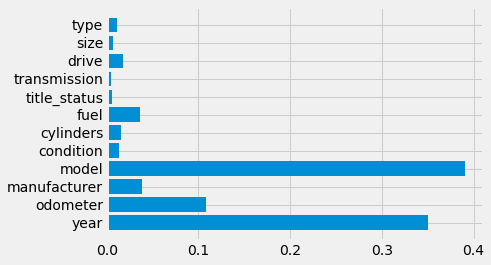

In [128]:
price_rf_reg_feat = ['year', 'odometer', 'manufacturer', 'model', 
                     'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type']
plt.barh(price_rf_reg_feat, price_rf_reg.feature_importances_);

### Tuning parameters - Although we know that higher the max_leafnodes, the better the accuracy. We are still running to check the accuracy and also because it takes a lot of time to run the grid, to reduce the load, we only took n_estimators=50 and 10 max_depth = 10. This is the reason for drop in accuracy (~50% level). But as we expect the graph is monotonically increasing for 'max_leaf_nodes' feature. Best parameter is 6 out of [2, 4, 6, 8] as expected.

Best RF Score =  0.6082747006259378
Best RF Parameter =  {'max_leaf_nodes': 8}


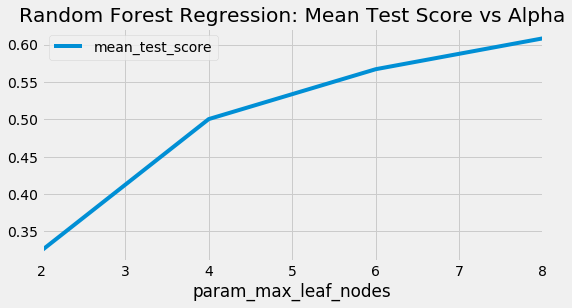

In [150]:
## GridSearching for Lasso Regression ##
from sklearn.model_selection import GridSearchCV
# param_grid = {'alpha': np.logspace(-10, 2, 10)}
param_grid = {'max_leaf_nodes': [2, 4, 6, 8]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=5, n_jobs =-1, max_depth = 10, n_estimators = 50), param_grid, cv=10)
rf_grid.fit(X_train_pro, y_train);
print("Best RF Score = " , str(rf_grid.best_score_));
print("Best RF Parameter = " , str(rf_grid.best_params_))

rf_results = pd.DataFrame(rf_grid.cv_results_)
fig, axis = plt.subplots(1,1,figsize = (8, 4))
rf_results.plot(x='param_max_leaf_nodes', y='mean_test_score', ax = axis);
axis.set_title("Random Forest Regression: Mean Test Score vs Alpha");

# Running the final model on the entire data set to determine the final model accuracy. The random forest model gave a testing score of 87.7%

In [131]:
### Taking the complete data ###
df1 = dfx;
df1 = df1[(df1['price'] < 200000) & (df1['price'] > 1000)]
df1 = df1[(df1.odometer < 300000) & (df1.odometer > 1000)]
df1 = df1[df1.year>1985]
drop_cols = ['id','url', 'region', 'region_url', 'vin', 'image_url', 'description', 'lat','long', 'state', 'county']
df1.drop(columns = drop_cols, inplace = True);

### Splitting the complete data ###
train_set, test_set = train_test_split(df1, test_size=0.20,random_state=3, shuffle = True)
y_train = train_set['price']
X_train = train_set.drop(columns = ['price'])
y_test = test_set['price']
X_test = test_set.drop(columns = ['price'])

In [132]:
### Training data processing ###
X_train.loc[X_train.year>=2019, 'condition'] = X_train.loc[X_train.year>=2019, 'condition'].fillna('new')
X_train.loc[X_train.year>=2017, 'condition'] = X_train.loc[X_train.year>=2017, 'condition'].fillna('like new')

X_train.loc[X_train['odometer'] <= like_new_odo_mean, 'condition'] = X_train.loc[X_train['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

X_train.loc[X_train['odometer'] >= fair_odo_mean, 'condition'] = X_train.loc[X_train['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

X_train.loc[((X_train['odometer'] > like_new_odo_mean) & 
       (X_train['odometer'] <= excellent_odo_mean)), 'condition'] = X_train.loc[((X_train['odometer'] > like_new_odo_mean) & 
       (X_train['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

X_train.loc[((X_train['odometer'] > excellent_odo_mean) & 
       (X_train['odometer'] <= good_odo_mean)), 'condition'] = X_train.loc[((X_train['odometer'] > excellent_odo_mean) & 
       (X_train['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

X_train.loc[((X_train['odometer'] > good_odo_mean) & 
       (X_train['odometer'] <= fair_odo_mean)), 'condition'] = X_train.loc[((X_train['odometer'] > good_odo_mean) & 
       (X_train['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

X_train['transmission'] = X_train['transmission'].fillna(method='ffill')
X_train['cylinders'] = X_train['cylinders'].fillna(method='ffill')
X_train['title_status'] = X_train['title_status'].fillna(method='ffill')
X_train['fuel'] = X_train['fuel'].fillna(method='ffill')
X_train['size'] = X_train['size'].fillna(method='ffill')
X_train['paint_color'] = X_train['paint_color'].fillna(method='ffill')
X_train['drive'] = X_train['drive'].fillna(method='ffill')
X_train['manufacturer'] = X_train['manufacturer'].fillna(method='ffill')
X_train['type'] = X_train['type'].fillna(method='ffill')
X_train['model'] = X_train['model'].fillna(method='ffill')

### Training data processing (cat data) ###
X_train['condition'].replace(['fair', 'salvage', 'good', 'excellent', 'like new', 'new'], 
                         [1,2,3,4,5,6], inplace = True)
X_train['cylinders'].replace(['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', 
                          '12 cylinders', 'other'], [2,3,1,4,7,6,8,5], inplace=True)
X_train['fuel'].replace(['hybrid', 'gas', 'electric', 'other', 'diesel'], [1,2,3,4,5], inplace=True);
X_train['drive'].replace(['fwd', 'rwd', '4wd'], [1,2,3], inplace=True);
X_train['type'].replace(['hatchback', 'mini-van', 'sedan'], [1,1,1], inplace=True);
X_train['type'].replace(['SUV', 'convertible', 'offroad','van', 'wagon'], [2,2,2,2,2], inplace=True);
X_train['type'].replace(['bus', 'other'], [3,3], inplace=True);
X_train['type'].replace(['coupe','pickup', 'truck'], [4,4,4], inplace=True);
X_train['title_status'].replace(['missing', 'parts only', 'salvage', 'rebuilt', 'clean', 'lien'], 
                                [1,1,2,3,4,5], inplace=True);
X_train['size'].replace(['compact', 'mid-size', 'sub-compact', 'full-size'], [1,2,3,4], inplace=True);
X_train['transmission'].replace(['manual', 'automatic', 'other'], [1,2,3], inplace=True);
X_train.drop(columns = ['paint_color'], inplace = True);

In [133]:
X_train_pro = preprocess.fit_transform(X_train, y_train);

In [134]:
### Testing data processing ###
X_test.loc[X_test.year>=2019, 'condition'] = X_test.loc[X_test.year>=2019, 'condition'].fillna('new')
X_test.loc[X_test.year>=2017, 'condition'] = X_test.loc[X_test.year>=2017, 'condition'].fillna('like new')

X_test.loc[X_test['odometer'] <= like_new_odo_mean, 'condition'] = X_test.loc[X_test['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

X_test.loc[X_test['odometer'] >= fair_odo_mean, 'condition'] = X_test.loc[X_test['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

X_test.loc[((X_test['odometer'] > like_new_odo_mean) & 
       (X_test['odometer'] <= excellent_odo_mean)), 'condition'] = X_test.loc[((X_test['odometer'] > like_new_odo_mean) & 
       (X_test['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

X_test.loc[((X_test['odometer'] > excellent_odo_mean) & 
       (X_test['odometer'] <= good_odo_mean)), 'condition'] = X_test.loc[((X_test['odometer'] > excellent_odo_mean) & 
       (X_test['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

X_test.loc[((X_test['odometer'] > good_odo_mean) & 
       (X_test['odometer'] <= fair_odo_mean)), 'condition'] = X_test.loc[((X_test['odometer'] > good_odo_mean) & 
       (X_test['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

X_test['transmission'] = X_test['transmission'].fillna(method='ffill')
X_test['cylinders'] = X_test['cylinders'].fillna(method='ffill')
X_test['title_status'] = X_test['title_status'].fillna(method='ffill')
X_test['fuel'] = X_test['fuel'].fillna(method='ffill')
X_test['size'] = X_test['size'].fillna(method='ffill')
X_test['paint_color'] = X_test['paint_color'].fillna(method='ffill')
X_test['drive'] = X_test['drive'].fillna(method='ffill')
X_test['manufacturer'] = X_test['manufacturer'].fillna(method='ffill')
X_test['type'] = X_test['type'].fillna(method='ffill')
X_test['model'] = X_test['model'].fillna(method='ffill')

### Testing data processing (cat data) ###
X_test['condition'].replace(['fair', 'salvage', 'good', 'excellent', 'like new', 'new'], 
                         [1,2,3,4,5,6], inplace = True)
X_test['cylinders'].replace(['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', 
                          '12 cylinders', 'other'], [2,3,1,4,7,6,8,5], inplace=True)
X_test['cylinders'].replace([np.nan], [1], inplace=True); #In case ffill could not have desired filling.
X_test['fuel'].replace(['hybrid', 'gas', 'electric', 'other', 'diesel'], [1,2,3,4,5], inplace=True);
X_test['drive'].replace(['fwd', 'rwd', '4wd'], [1,2,3], inplace=True);
X_test['type'].replace(['hatchback', 'mini-van', 'sedan'], [1,1,1], inplace=True);
X_test['type'].replace(['SUV', 'convertible', 'offroad','van', 'wagon'], [2,2,2,2,2], inplace=True);
X_test['type'].replace(['bus', 'other'], [3,3], inplace=True);
X_test['type'].replace(['coupe','pickup', 'truck'], [4,4,4], inplace=True);
X_test['title_status'].replace(['missing', 'parts only', 'salvage', 'rebuilt', 'clean', 'lien'], 
                                [1,1,2,3,4,5], inplace=True);
X_test['size'].replace(['compact', 'mid-size', 'sub-compact', 'full-size'], [1,2,3,4], inplace=True);
X_test['size'].replace([np.nan], [1], inplace=True); #In case ffill could not have desired filling.
X_test['transmission'].replace(['manual', 'automatic', 'other'], [1,2,3], inplace=True);
X_test['transmission'].replace([np.nan], [1], inplace=True); #In case ffill could not have desired filling.
X_test.drop(columns = ['paint_color'], inplace = True);

In [135]:
X_test_pro = preprocess.transform(X_test);

In [136]:
price_rf_best_reg = RandomForestRegressor(random_state=5, n_jobs =-1, max_depth = 30, n_estimators=100)
price_rf_best_reg.fit(X_train_pro, y_train);
print("Testing Accurancy for Random Forest model:", price_rf_best_reg.score(X_test_pro, y_test))

Testing Accurancy for Random Forest model: 0.8774886512133389


##### End of task 4. Testing data accuracy of the final model is 87.7%. 

## Task 5 (Feature Selections)

### Taking from the feature importance graph of above task 4 and selecting only the top 4 significant features out of the 12 and checking the accuracy. The top features are 'model', 'year', 'odometer', 'fuel'. 

In [137]:
# Dropping the exlcuded columns.
X_train_final_feat = X_train.drop(columns = ['manufacturer','title_status', 'transmission', 'size','drive', 'cylinders', 'condition', 'type']);
X_test_final_feat = X_test.drop(columns = ['manufacturer','title_status', 'transmission', 'size','drive', 'cylinders', 'condition', 'type']);


In [138]:
num_cols = ['year', 'odometer']
tgt_cols = ['model']
prc_cols = ['fuel']

#Scaling features after imputing, although is not helping much !!

num_pipe = Pipeline([('median_imputing', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                    ("scaler", StandardScaler())])

tgt_pipe = Pipeline([('tgt_encoding', ce.TargetEncoder(handle_missing='value', handle_unknown='value')), 
                    (("scaler", StandardScaler()))])

preprocess_final = ColumnTransformer(transformers = [("num_imp", num_pipe, num_cols),
                                               ("tgt_enc", tgt_pipe, tgt_cols)], remainder='passthrough')

In [139]:
X_train_final_feat_pro = preprocess_final.fit_transform(X_train_final_feat, y_train);
X_test_final_feat_pro = preprocess_final.transform(X_test_final_feat);

In [140]:
price_rf_final_reg = RandomForestRegressor(random_state=5, n_jobs =-1, max_depth = 30, n_estimators=100);
price_rf_final_reg.fit(X_train_final_feat_pro, y_train);
print("Testing Accurancy for Random Forest model:", price_rf_final_reg.score(X_test_final_feat_pro, y_test))

Testing Accurancy for Random Forest model: 0.8446270345877


### With just 4 main features, we are still able to get 84.5% score which is very close to the model built using 12 feautures. Now, we can analyze any explainable model using these four main feautures.

## Task 6 (Explainable Model) - Showing a linear Model for this task.

In [141]:
### Explainable Model ###
lin_reg = LinearRegression().fit(X_train_final_feat_pro, y_train)
print("Testing Data Score (Explainable Linear Model):", lin_reg.score(X_test_final_feat_pro, y_test))

Testing Data Score (Explainable Linear Model): 0.6921127124731307


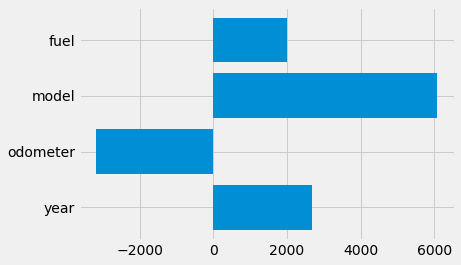

In [142]:
lin_reg.coef_;
price_lr_reg_feat = ['year', 'odometer', 'model', 'fuel'];
plt.barh(price_lr_reg_feat, lin_reg.coef_);

## The explainable linear model seems to be corerct as per intuition. The odometer has a negative relationship with price and the rest of the variables (year, model and fuel) have positive relationship.
## For odometer - lesser the mileage on the car, higher the price
## For year - newer the car, higher the year - higher the price
## For model and fuel - when we did ordinal encoding, we used positive monotonicity b/w the variables and price.

## So overall, everything seems to be falling in place and explainable.

In [143]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
####Decission Tree Regressor
price_dt_reg = DecisionTreeRegressor(max_depth=7)
price_dt_reg.fit(X_train_final_feat_pro, y_train);
print("The testing data score of decesion regression tree: ", price_dt_reg.score(X_test_final_feat_pro, y_test))

# price_dt_reg.score(X_train_final_feat_pro, y_train)

The testing data score of decesion regression tree:  0.733670140074195


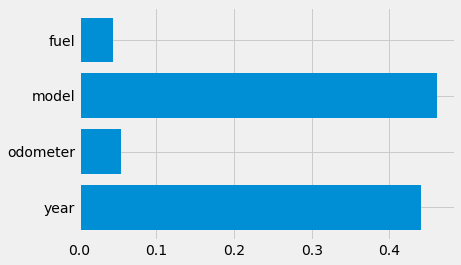

In [145]:
price_dt_reg_feat = ['year', 'odometer', 'model', 'fuel']
price_dt_reg.feature_importances_;
plt.barh(price_dt_reg_feat, price_dt_reg.feature_importances_);

In [146]:
# # Visualizing a Single Decision Tree

# # Import tools needed for visualization
# # rf= regressor
# features = df2.drop('price', axis = 1)

# # Saving feature names for later use
# feature_list = list(features.columns)
# # Convert to numpy array
# features = np.array(features)

In [147]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot

# # Limit depth of tree to 3 levels
# rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
# rf_small.fit(X_train_pro, y_train)
# # Extract the small tree
# tree_small = rf_small.estimators_[5]
# # Save the tree as a png image
# export_graphviz(tree_small, out_file = 'small_tree.dot',
#                 feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

# (graph, ) = pydot.graph_from_dot_file('/Users/ruthvikmannuru/Documents/Columbia/Sem2/AML/homework/hw3/small_tree.dot')
# graph.write_png('small_tree.png');

In [148]:
# from IPython.display import Image
# Image(filename = 'small_tree.png')